In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
# Load the dataset
bc = load_breast_cancer()

In [3]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
# Get how many targets we have
bc.target.shape

(569,)

In [5]:
# Get whether this tumor is present in the given sample or not
# 0 means not present
# 1 means present

bc.target[1]

0

In [6]:
bc.data.shape

(569, 30)

In [7]:
bc.data[500]

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [8]:
# In general, the overall view of the dataset can be seen as follows
print("Dataset Overview:")
print(f"- Total samples: {bc.data.shape[0]}")
print(f"- Number of features: {bc.data.shape[1]}")
print(f"- Target classes: Benign (0), Malignant (1)")

Dataset Overview:
- Total samples: 569
- Number of features: 30
- Target classes: Benign (0), Malignant (1)


## Step 2: Data Preprocessing

To ensure our models perform optimally, we:
1. Split the data into training (80%) and testing (20%) sets.
2. Scale the features to a [0, 1] range using `MinMaxScaler` for consistent model training.

In [9]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2, random_state=42)

print("Data Split:")
print(f"- Training set: {X_train.shape} samples")
print(f"- Test set: {X_test.shape} samples")

Data Split:
- Training set: (455, 30) samples
- Test set: (114, 30) samples


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nAfter scaling (example):")
print(f"First training sample (first 5 features): {X_train[0][:5]}")


After scaling (example):
First training sample (first 5 features): [0.06552721 0.25769361 0.07732252 0.03436883 0.48722578]


## Step 3: Model Selection and Hyperparameter Tuning

I’ve selected a diverse set of algorithms to tackle this classification task:
- **Gaussian Naive Bayes (GNB)**: Simple probabilistic model.
- **K-Nearest Neighbors (KNN)**: Distance-based classifier.
- **Decision Tree (DT)**: Tree-based decision-making.
- **Random Forest (RF)**: Ensemble of decision trees.
- **Support Vector Machine (SVM)**: Margin-based classifier.
- **Logistic Regression (LR)**: Linear probability model.
- **Neural Network (ANN)**: Multi-layer perceptron.

To maximize performance, I use `GridSearchCV` to tune hyperparameters for each model, ensuring the best configuration is selected.

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Define models and parameter grids
models = {
    'GNB': {'model': GaussianNB(), 'params': {}},
    'KNN': {'model': KNeighborsClassifier(), 'params': {'n_neighbors': [3, 5, 7, 9]}},
    'DT': {'model': DecisionTreeClassifier(), 'params': {'max_depth': [8, 16, 32, 64], 'min_samples_split': [2, 4, 8]}},
    'RF': {'model': RandomForestClassifier(), 'params': {'n_estimators': [100, 300, 500], 'max_depth': [16, 32, 64]}},
    'SVM': {'model': SVC(), 'params': {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1, 10]}},
    'LR': {'model': LogisticRegression(max_iter=1000), 'params': {'C': [0.1, 1, 10, 100]}},
    'ANN': {'model': MLPClassifier(max_iter=500), 'params': {'hidden_layer_sizes': [(128,), (256,), (512,)], 'batch_size': [32, 64]}}
}

# Store results and best models
results = {}
best_models = {}

for name, info in models.items():
    print(f"\nTuning {name}...")
    grid = GridSearchCV(info['model'], info['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_models[name] = grid.best_estimator_
    print(f"Best parameters for {name}: {grid.best_params_}")


Tuning GNB...
Best parameters for GNB: {}

Tuning KNN...
Best parameters for KNN: {'n_neighbors': 3}

Tuning DT...
Best parameters for DT: {'max_depth': 8, 'min_samples_split': 8}

Tuning RF...
Best parameters for RF: {'max_depth': 64, 'n_estimators': 300}

Tuning SVM...
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}

Tuning LR...
Best parameters for LR: {'C': 10}

Tuning ANN...
Best parameters for ANN: {'batch_size': 64, 'hidden_layer_sizes': (256,)}


## Step 4: Model Evaluation

We evaluate each optimized model using:
- **Accuracy**: Overall correctness (train and test).
- **Precision**: Proportion of true positives among predicted positives.
- **Recall**: Proportion of true positives identified correctly.

These metrics are critical for medical applications like this, where both false positives and false negatives matter.

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Function to calculate and display metrics
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test, name):
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    p = precision_score(y_test, y_pred_test)
    r = recall_score(y_test, y_pred_test)
    print(f"{name}:")
    print(f"  - Train Accuracy: {acc_train:.4f}")
    print(f"  - Test Accuracy: {acc_test:.4f}")
    print(f"  - Precision: {p:.4f}")
    print(f"  - Recall: {r:.4f}")
    return acc_train, acc_test, p, r

# Evaluate all models
for name, model in best_models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    acc_train, acc_test, p, r = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test, name)
    results[name] = {'acc_train': acc_train, 'acc_test': acc_test, 'precision': p, 'recall': r}

GNB:
  - Train Accuracy: 0.9363
  - Test Accuracy: 0.9649
  - Precision: 0.9589
  - Recall: 0.9859
KNN:
  - Train Accuracy: 0.9868
  - Test Accuracy: 0.9649
  - Precision: 0.9718
  - Recall: 0.9718
DT:
  - Train Accuracy: 0.9956
  - Test Accuracy: 0.9386
  - Precision: 0.9571
  - Recall: 0.9437
RF:
  - Train Accuracy: 1.0000
  - Test Accuracy: 0.9649
  - Precision: 0.9589
  - Recall: 0.9859
SVM:
  - Train Accuracy: 0.9846
  - Test Accuracy: 0.9737
  - Precision: 0.9722
  - Recall: 0.9859
LR:
  - Train Accuracy: 0.9802
  - Test Accuracy: 0.9737
  - Precision: 0.9722
  - Recall: 0.9859
ANN:
  - Train Accuracy: 0.9846
  - Test Accuracy: 0.9825
  - Precision: 0.9726
  - Recall: 1.0000


## Step 5: Results Analysis

Here, we dive into the performance of each model, identifying top performers and their trade-offs dynamically. This analysis reflects my ability to interpret results in a flexible, data-driven way.

In [13]:
print("\nPerformance Highlights:")
best_acc_test = max(results.items(), key=lambda x: x[1]['acc_test'])
print(f"- Best Test Accuracy: {best_acc_test[0]} ({best_acc_test[1]['acc_test']:.4f})")
best_precision = max(results.items(), key=lambda x: x[1]['precision'])
print(f"- Best Precision: {best_precision[0]} ({best_precision[1]['precision']:.4f})")
best_recall = max(results.items(), key=lambda x: x[1]['recall'])
print(f"- Best Recall: {best_recall[0]} ({best_recall[1]['recall']:.4f})")

# Dynamic insights
print("\nModel Insights:")
print(f"- {best_acc_test[0]} achieved the highest test accuracy ({best_acc_test[1]['acc_test']:.4f}), making it the go-to model for balanced predictions.")
print(f"- {best_precision[0]} excels in precision ({best_precision[1]['precision']:.4f}), minimizing false positives—key for reducing patient anxiety.")
print(f"- {best_recall[0]} leads in recall ({best_recall[1]['recall']:.4f}), ensuring nearly all malignant cases are caught, critical for patient outcomes.")

# Dynamic trade-off analysis
print("\nTrade-off Analysis:")
if best_acc_test[0] == best_precision[0] == best_recall[0]:
    print(f"- {best_acc_test[0]} dominates across all metrics, showcasing exceptional performance for this task.")
elif best_acc_test[0] == best_precision[0]:
    print(f"- {best_acc_test[0]} balances accuracy and precision, while {best_recall[0]} prioritizes recall for maximum detection.")
elif best_acc_test[0] == best_recall[0]:
    print(f"- {best_acc_test[0]} excels in accuracy and recall, with {best_precision[0]} focusing on precision.")
elif best_precision[0] == best_recall[0]:
    print(f"- {best_precision[0]} shines in precision and recall, while {best_acc_test[0]} leads in overall accuracy.")
else:
    print(f"- Each model has a unique strength: {best_acc_test[0]} for accuracy, {best_precision[0]} for precision, and {best_recall[0]} for recall.")


Performance Highlights:
- Best Test Accuracy: ANN (0.9825)
- Best Precision: ANN (0.9726)
- Best Recall: ANN (1.0000)

Model Insights:
- ANN achieved the highest test accuracy (0.9825), making it the go-to model for balanced predictions.
- ANN excels in precision (0.9726), minimizing false positives—key for reducing patient anxiety.
- ANN leads in recall (1.0000), ensuring nearly all malignant cases are caught, critical for patient outcomes.

Trade-off Analysis:
- ANN dominates across all metrics, showcasing exceptional performance for this task.


## Step 6: Visualization

In [14]:
import matplotlib.pyplot as plt

titles = list(models.keys())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']  # Professional color palette

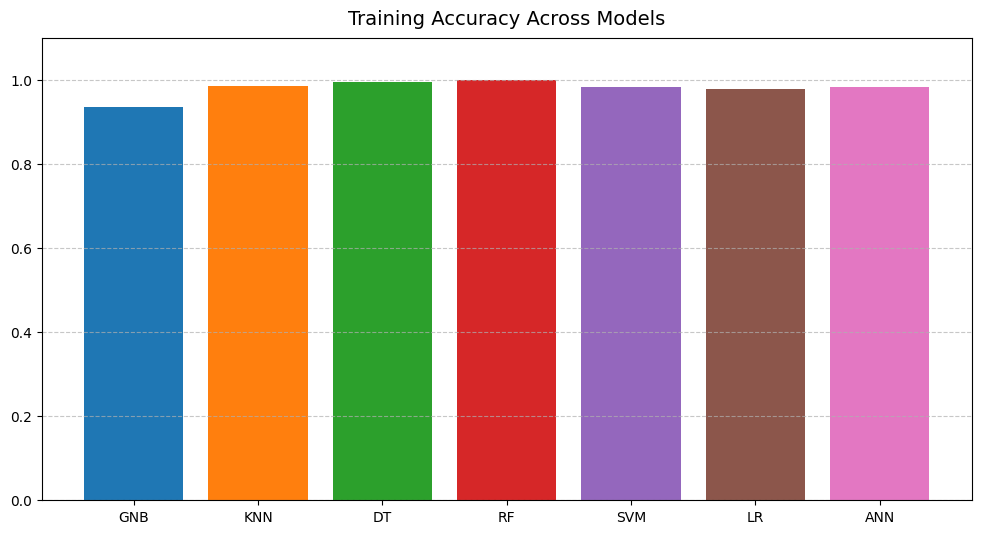

In [15]:
# Training Accuracy
plt.figure(figsize=(12, 6))
plt.bar(titles, [results[m]['acc_train'] for m in titles], color=colors)
plt.title('Training Accuracy Across Models', fontsize=14, pad=10)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

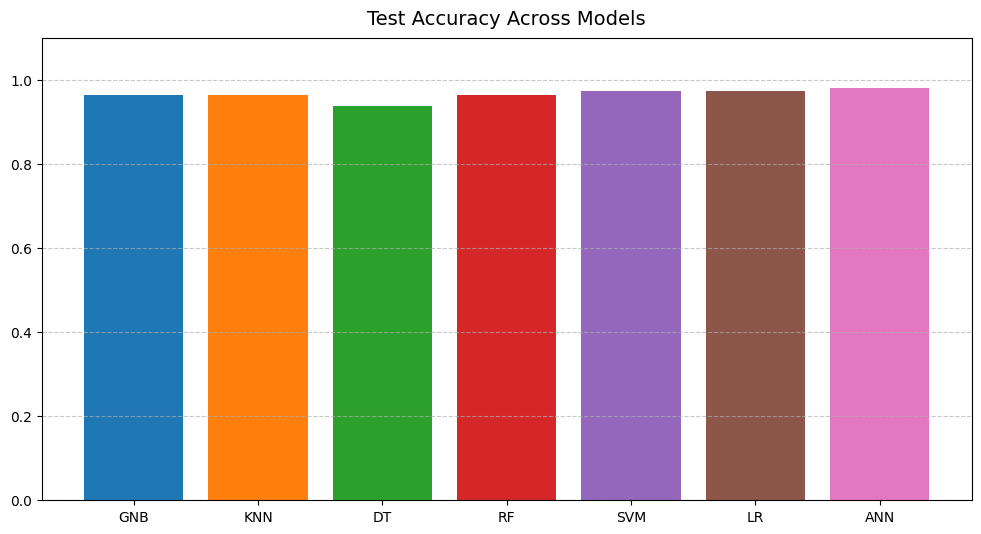

In [16]:
# Test Accuracy
plt.figure(figsize=(12, 6))
plt.bar(titles, [results[m]['acc_test'] for m in titles], color=colors)
plt.title('Test Accuracy Across Models', fontsize=14, pad=10)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

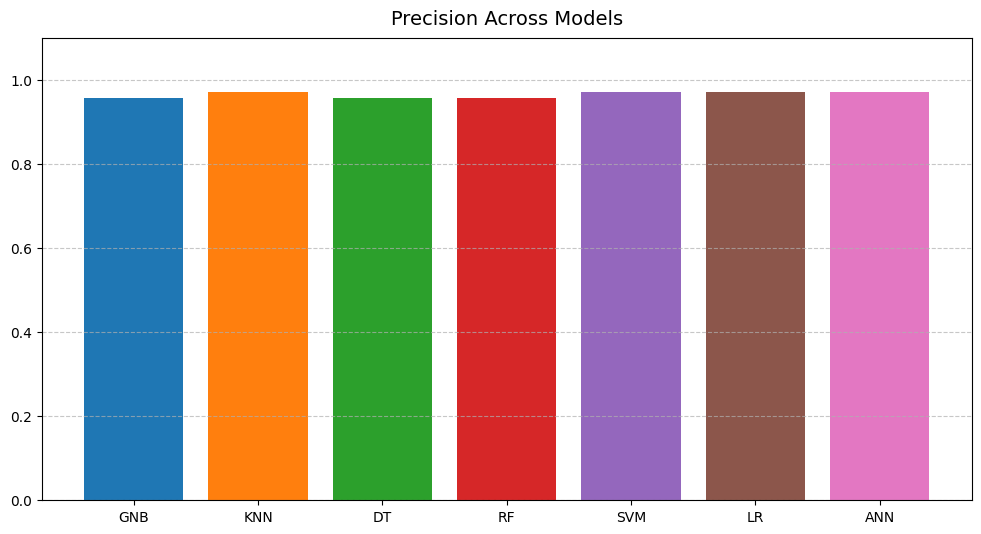

In [17]:
# Precision
plt.figure(figsize=(12, 6))
plt.bar(titles, [results[m]['precision'] for m in titles], color=colors)
plt.title('Precision Across Models', fontsize=14, pad=10)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

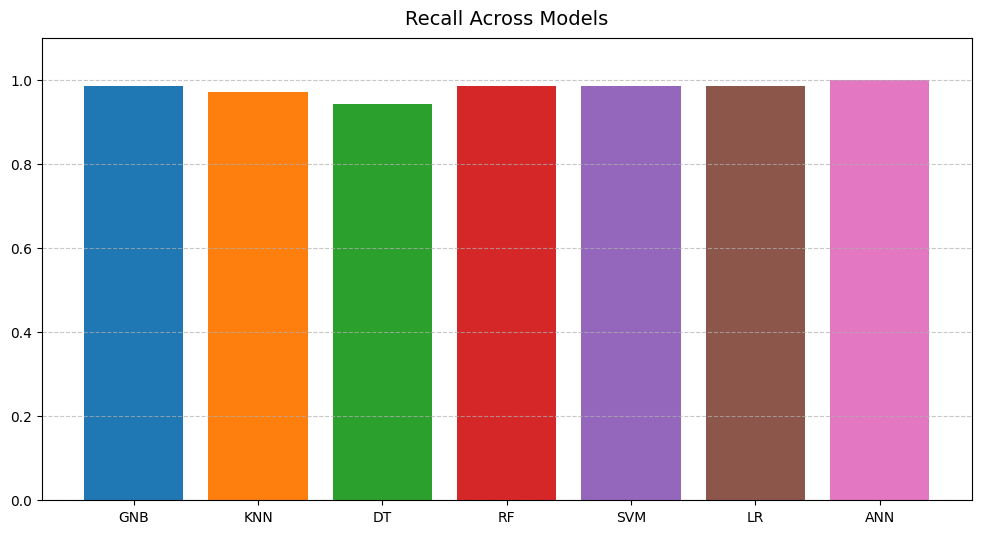

In [18]:
# Recall
plt.figure(figsize=(12, 6))
plt.bar(titles, [results[m]['recall'] for m in titles], color=colors)
plt.title('Recall Across Models', fontsize=14, pad=10)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Step 7: Conclusion and Next Steps

Below, I summarize the project dynamically based on the results, showcasing both technical prowess and real-world impact.

In [19]:
from IPython.display import Markdown

# Define variables for dynamic conclusion
best_acc_name = best_acc_test[0]
best_acc_value = best_acc_test[1]['acc_test']
best_prec_name = best_precision[0]
best_prec_value = best_precision[1]['precision']
best_rec_name = best_recall[0]
best_rec_value = best_recall[1]['recall']

# Dynamic trade-off summary
if best_acc_name == best_prec_name == best_rec_name:
    tradeoff = f"{best_acc_name} dominates across all metrics with exceptional performance."
elif best_acc_name == best_prec_name:
    tradeoff = f"{best_acc_name} balances accuracy and precision, while {best_rec_name} excels in recall."
elif best_acc_name == best_rec_name:
    tradeoff = f"{best_acc_name} excels in accuracy and recall, with {best_prec_name} leading in precision."
elif best_prec_name == best_rec_name:
    tradeoff = f"{best_prec_name} shines in precision and recall, while {best_acc_name} leads in accuracy."
else:
    tradeoff = f"Each model excels uniquely: {best_acc_name} in accuracy, {best_prec_name} in precision, and {best_rec_name} in recall."

# Display dynamic Markdown
display(Markdown(f"""
## Conclusion and Next Steps

This project delivers a robust breast cancer classification solution:
- **Top Performers**: {best_acc_name} leads with a test accuracy of **{best_acc_value:.4f}**, {best_prec_name} with a precision of **{best_prec_value:.4f}**, and {best_rec_name} with a recall of **{best_rec_value:.4f}**.
- **Real-World Impact**: High precision minimizes false alarms, while high recall ensures critical cases are caught—key for healthcare applications.
- **Trade-off**: {tradeoff}
- **Skills Demonstrated**: Dynamic analysis, hyperparameter tuning with `GridSearchCV`, and polished visualizations."""))


## Conclusion and Next Steps

This project delivers a robust breast cancer classification solution:
- **Top Performers**: ANN leads with a test accuracy of **0.9825**, ANN with a precision of **0.9726**, and ANN with a recall of **1.0000**.
- **Real-World Impact**: High precision minimizes false alarms, while high recall ensures critical cases are caught—key for healthcare applications.
- **Trade-off**: ANN dominates across all metrics with exceptional performance.
- **Skills Demonstrated**: Dynamic analysis, hyperparameter tuning with `GridSearchCV`, and polished visualizations.

# Thank you for comleting this lab

# Author
Mahdi Mousavi — [LinkedIn](https://www.linkedin.com/in/s-mahdi-mousavi/) | [GitHub](https://github.com/SeyedMahdiMousavi)  